In [2]:
# https://ourcodingclub.github.io/tutorials/topic-modelling-python/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [3]:
df = pd.read_csv("top10_tweets_2020_2019.csv")
df.head()

FileNotFoundError: File b'top10_tweets_2020_2019.csv' does not exist

In [ ]:
# make a new column to highlight retweets
df['is_retweet'] = df['text'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

In [ ]:
# number of unique retweets
df.loc[df['is_retweet']].text.unique().size

In [141]:
# 10 most repeated tweets
df.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,counts
23663,RT @SenTedCruz TO THE AMERICAN PEOPLE: This is...,10
24371,RT @TeamPelosi Trump abused his power for pers...,6
19423,"RT @FreedomWorks .@SenTedCruz: ""Green New Deal...",5
24376,"RT @TeamPelosi Trump: ""I am proud to shut down...",5
19424,RT @FreedomWorks A significant majority of Ame...,5
19216,"RT @Everytown Along with @MomsDemand, we are p...",4
23777,RT @SenTedCruz What’s happening in the House h...,4
24325,RT @TeamPelosi No. You *don't* ask foreign gov...,4
29309,RT @taxreformer Taxing inflation is wrong and ...,4
28101,RT @missykurek “For anyone who says women can’...,4


/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  from ipykernel import kernelapp as app


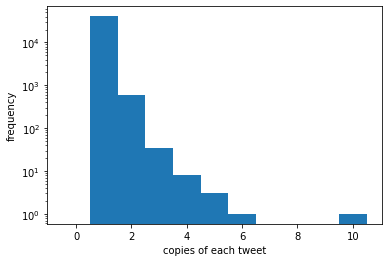

In [142]:
# number of times each tweet appears
counts = df.groupby(['text']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()
# most retweeted tweets are retweeted once in our dataset

In [143]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:3: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \s
<>:3: DeprecationWarning: invalid escape sequence \s
<>:7: DeprecationWarning: invalid escape sequence \s
<ipython-input-143-4e1c32e5b7d7>:3: DeprecationWarning: invalid escape sequence \s
  return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
<ipython-input-143-4e1c32e5b7d7>:7: DeprecationWarning: invalid escape sequence \s
  return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)


In [144]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.text.apply(find_retweeted)
df['mentioned'] = df.text.apply(find_mentioned)
df['hashtags'] = df.text.apply(find_hashtags)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [145]:
df.head(8)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Unnamed: 0.1,screen_names,text,link,time,is_retweet,retweeted,mentioned,hashtags
0,0,0.0,TeamPelosi,"RT @NoOneIsAboveLaw ""We all take an oath to pr...",https://www.twitter.com/NoOneIsAboveLaw/status...,2019-11-21T23:46:08-05:00,True,[@NoOneIsAboveLaw],[@SpeakerPelosi],[#CountryOverPolitics]
1,1,1.0,marcorubio,"RT @SquawkCNBC ""I think China needs to stop in...",https://www.twitter.com/SquawkCNBC/statuses/11...,2019-11-21T13:34:41-05:00,True,[@SquawkCNBC],[@MarcoRubio],[]
2,2,2.0,BernieSanders,This is absolutely unacceptable and Bright Pow...,https://www.twitter.com/BernieSanders/statuses...,2019-11-21T20:40:00-05:00,False,[],"[@LaurenKGurley, @AOC]",[]
3,3,3.0,CoryBooker,Dignity in work means strong unions and fair l...,https://www.twitter.com/CoryBooker/statuses/11...,2019-11-21T16:46:32-05:00,False,[],[@IowaAFLCIO],[]
4,4,4.0,BernieSanders,We will cancel student debt. We will make publ...,https://www.twitter.com/BernieSanders/statuses...,2019-11-21T12:57:53-05:00,False,[],[],[]
5,5,5.0,SpeakerPelosi,As the House concludes another week of our wor...,https://www.twitter.com/SpeakerPelosi/statuses...,2019-11-21T10:55:45-05:00,False,[],[],[#ForThePeople]
6,6,6.0,SenTedCruz,RT @SenTedCruz Tune in at ~4:30pm ET for my in...,https://www.twitter.com/SenTedCruz/statuses/11...,2019-11-21T16:36:43-05:00,True,[@SenTedCruz],[@benshapiro],"[#HongKongProtests, #DemDebate]"
7,7,7.0,TeamPelosi,RT @mikesmith_DC .@NRCC is off to a great star...,https://www.twitter.com/mikesmith_DC/statuses/...,2019-11-21T16:48:13-05:00,True,[@mikesmith_DC],"[@NRCC, @DCCC, @TeamPelosi, @dccc, @NRCC]",[]


In [146]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]
hashtags_list_df.head(8)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hashtags
0,[#CountryOverPolitics]
5,[#ForThePeople]
6,"[#HongKongProtests, #DemDebate]"
8,[#DC]
10,[#HongKong]
13,"[#ArmenianGenocide, #Turkey]"
14,[#ArmenianGenocide]
15,[#RightToKnowBeforeYouGo]


In [147]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])
flattened_hashtags_df.head(8)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hashtag
0,#CountryOverPolitics
1,#ForThePeople
2,#HongKongProtests
3,#DemDebate
4,#DC
5,#HongKong
6,#ArmenianGenocide
7,#Turkey


In [148]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5013

In [149]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_hashtags

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hashtag,counts
0,#Venezuela,725
1,#China,462
2,#coronavirus,436
3,#ForThePeople,400
4,#COVID19,387
...,...,...
5008,#MahaliaJackson,1
5009,#MainStreetNotWallStreet,1
5010,#Maiquetia,1
5011,#MakeItYours,1


/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  from ipykernel import kernelapp as app


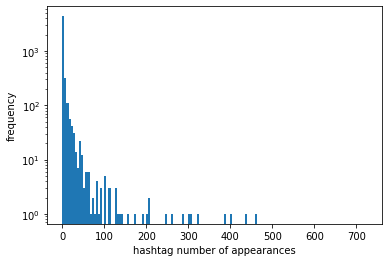

In [150]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [151]:
# take hashtags which appear at least this amount of times
min_appearance = 120
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [152]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [153]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [154]:
# hashtag_vector_df.head()

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [1]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=.5,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()


NameError: name 'hashtag_vector_df' is not defined

In [156]:
##Repeat analysis above but for mentioned instead of hashtags

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [157]:
# take the rows from the hashtag columns where there are actually hashtags
mentioned_list_df = df.loc[
                       df.mentioned.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['mentioned']]
mentioned_list_df.head(5)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mentioned
0,[@SpeakerPelosi]
1,[@MarcoRubio]
2,"[@LaurenKGurley, @AOC]"
3,[@IowaAFLCIO]
6,[@benshapiro]


In [158]:
# create dataframe where each use of hashtag gets its own row
flattened_mentioned_df = pd.DataFrame(
    [mentioned for mentioned_list in mentioned_list_df.mentioned
    for mentioned in mentioned_list],
    columns=['mentioned'])
flattened_hashtags_df.head(8)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,hashtag
0,#CountryOverPolitics
1,#ForThePeople
2,#HongKongProtests
3,#DemDebate
4,#DC
5,#HongKong
6,#ArmenianGenocide
7,#Turkey


In [159]:
# count of appearances of each hashtag
popular_mentions = flattened_mentioned_df.groupby('mentioned').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_mentions

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mentioned,counts
0,@AOC,1815
1,@BernieSanders,1669
2,@SenTedCruz,1113
3,@realDonaldTrump,999
4,@tedcruz,995
...,...,...
8927,@OKJusticeReform,1
8928,@OJPAC,1
8929,@OIEAnimalHealth,1
8930,@OFB2020,1


/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  from ipykernel import kernelapp as app


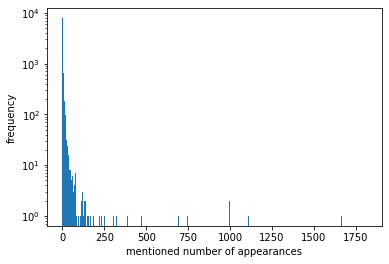

In [160]:
# number of times each hashtag appears
counts = flattened_mentioned_df.groupby(['mentioned']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('mentioned number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [161]:
# take hashtags which appear at least this amount of times
min_appearance = 400
# find popular hashtags - make into python set for efficiency
popular_mentioned_set = set(popular_mentions[
                           popular_mentions.counts>=min_appearance
                           ]['mentioned'])

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [162]:
# make a new column with only the popular hashtags
mentioned_list_df['popular_mentions'] = mentioned_list_df.mentioned.apply(
            lambda mentioned_list: [mentioned for mentioned in mentioned_list
                                  if mentioned in popular_mentioned_set])
# drop rows without popular hashtag
popular_mentioned_list_df = mentioned_list_df.loc[
            mentioned_list_df.popular_mentions.apply(lambda mentioned_list: mentioned_list !=[])]
popular_mentioned_list_df.head()

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,mentioned,popular_mentions
0,[@SpeakerPelosi],[@SpeakerPelosi]
2,"[@LaurenKGurley, @AOC]",[@AOC]
7,"[@NRCC, @DCCC, @TeamPelosi, @dccc, @NRCC]",[@TeamPelosi]
13,[@SenTedCruz],[@SenTedCruz]
16,"[@BernieSanders, @MoreHouse]",[@BernieSanders]


In [163]:
# make new dataframe
mentioned_vector_df = popular_mentioned_list_df.loc[:, ['popular_mentions']]

for mentioned in popular_mentioned_set:
    # make columns to encode presence of hashtags
    mentioned_vector_df['{}'.format(mentioned)] = mentioned_vector_df.popular_mentions.apply(
        lambda mentioned_list: int(mentioned in mentioned_list))

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


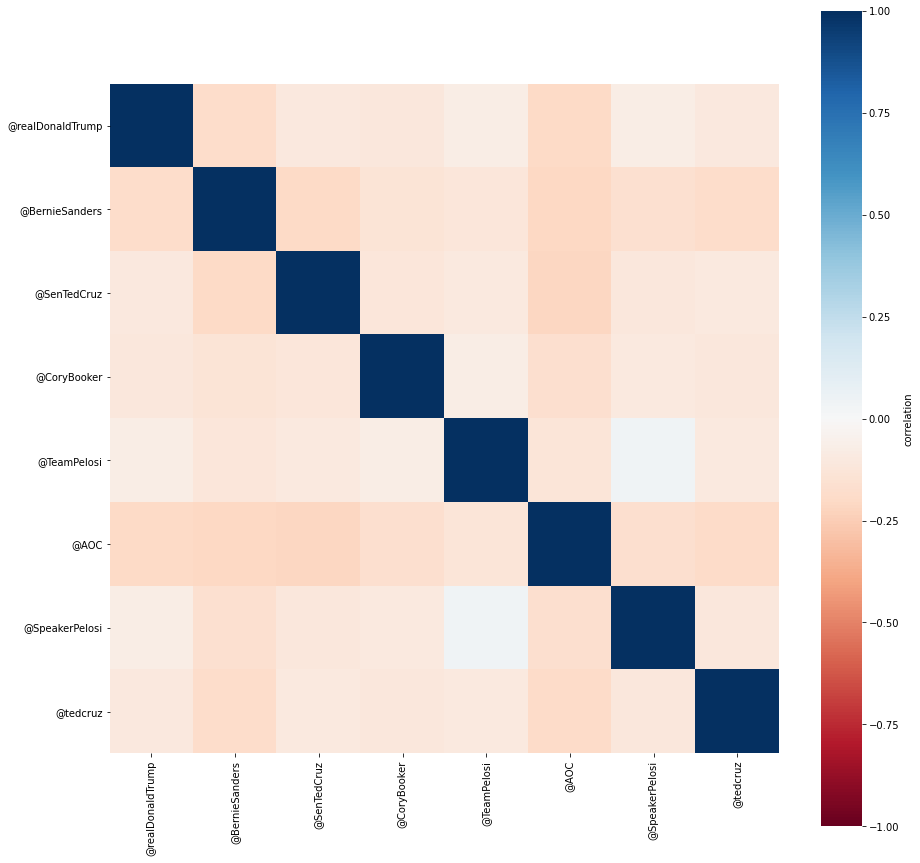

In [164]:
mentioned_matrix = mentioned_vector_df.drop('popular_mentions', axis=1)
# calculate the correlation matrix
correlations = mentioned_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()


In [188]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/claytonnorth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [189]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet
def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:9: DeprecationWarning: invalid escape sequence \s
<>:9: DeprecationWarning: invalid escape sequence \s
<>:9: DeprecationWarning: invalid escape sequence \s
<ipython-input-189-696c8651f155>:9: DeprecationWarning: invalid escape sequence \s
  tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet


In [190]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=True):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:11: DeprecationWarning: invalid escape sequence \s
<>:11: DeprecationWarning: invalid escape sequence \s
<>:11: DeprecationWarning: invalid escape sequence \s
<ipython-input-190-056f5b3773f3>:11: DeprecationWarning: invalid escape sequence \s
  tweet = re.sub('\s+', ' ', tweet) #remove double spacing


In [191]:
df['clean_tweet'] = df.text.apply(clean_tweet)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [192]:
df.head(10)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Unnamed: 0.1,screen_names,text,link,time,is_retweet,retweeted,mentioned,hashtags,clean_tweet,lemma_tokens
0,0,0.0,TeamPelosi,"RT @NoOneIsAboveLaw ""We all take an oath to pr...",https://www.twitter.com/NoOneIsAboveLaw/status...,2019-11-21T23:46:08-05:00,True,[@NoOneIsAboveLaw],[@SpeakerPelosi],[#CountryOverPolitics],take oath protect defend constitut unit state...,"[take, oath, protect, defend, constitut, unit,..."
1,1,1.0,marcorubio,"RT @SquawkCNBC ""I think China needs to stop in...",https://www.twitter.com/SquawkCNBC/statuses/11...,2019-11-21T13:34:41-05:00,True,[@SquawkCNBC],[@MarcoRubio],[],think china need stop interf intern affair un...,"[think, china, need, stop, interf, intern, aff..."
2,2,2.0,BernieSanders,This is absolutely unacceptable and Bright Pow...,https://www.twitter.com/BernieSanders/statuses...,2019-11-21T20:40:00-05:00,False,[],"[@LaurenKGurley, @AOC]",[],absolut unaccept bright power must held accoun...,"[absolut, unaccept, bright, power, must, held,..."
3,3,3.0,CoryBooker,Dignity in work means strong unions and fair l...,https://www.twitter.com/CoryBooker/statuses/11...,2019-11-21T16:46:32-05:00,False,[],[@IowaAFLCIO],[],digniti work mean strong union fair labor prac...,"[digniti, work, mean, strong, union, fair, lab..."
4,4,4.0,BernieSanders,We will cancel student debt. We will make publ...,https://www.twitter.com/BernieSanders/statuses...,2019-11-21T12:57:53-05:00,False,[],[],[],cancel student debt make public colleg univers...,"[cancel, student, debt, make, public, colleg, ..."
5,5,5.0,SpeakerPelosi,As the House concludes another week of our wor...,https://www.twitter.com/SpeakerPelosi/statuses...,2019-11-21T10:55:45-05:00,False,[],[],[#ForThePeople],hous conclud anoth week work #forthepeople tak...,"[hous, conclud, anoth, week, work, #forthepeop..."
6,6,6.0,SenTedCruz,RT @SenTedCruz Tune in at ~4:30pm ET for my in...,https://www.twitter.com/SenTedCruz/statuses/11...,2019-11-21T16:36:43-05:00,True,[@SenTedCruz],[@benshapiro],"[#HongKongProtests, #DemDebate]",tune pm et interview discuss #hongkongprotes...,"[tune, pm, et, interview, discuss, #hongkongpr..."
7,7,7.0,TeamPelosi,RT @mikesmith_DC .@NRCC is off to a great star...,https://www.twitter.com/mikesmith_DC/statuses/...,2019-11-21T16:48:13-05:00,True,[@mikesmith_DC],"[@NRCC, @DCCC, @TeamPelosi, @dccc, @NRCC]",[],great start cycl take lot effort get outrais ...,"[great, start, cycl, take, lot, effort, get, o..."
8,8,8.0,tedcruz,Awesome artwork by Houston student from Rodeo ...,https://www.twitter.com/tedcruz/statuses/11976...,2019-11-21T15:57:10-05:00,False,[],[@univision],[#DC],awesom artwork houston student rodeo palm jr h...,"[awesom, artwork, houston, student, rodeo, pal..."
9,9,9.0,tedcruz,¯\_(ツ)_/¯ https://twitter.com/brentscher/statu...,https://www.twitter.com/tedcruz/statuses/11976...,2019-11-21T16:32:11-05:00,False,[],[@BrentScher],[],¯\ ツ ¯ qt anti fracker russian asset ¯\_ツ ツ_¯...,"[¯\, ツ, ¯, qt, anti, fracker, russian, asset, ..."


In [193]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
# max_df to filter words that appear in less than 90% and more than 25 %
vectorizer = CountVectorizer(max_df=0.9, min_df=40, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()
# total frequency of words that made it through filtering
tf.shape

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<ipython-input-193-ff5b9142cc89>:5: DeprecationWarning: invalid escape sequence \w
  vectorizer = CountVectorizer(max_df=0.9, min_df=40, token_pattern='\w+|\$[\d\.]+|\S+')


(42215, 4063)

In [194]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 20

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [195]:
model.fit(tf)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=20, random_state=0)

In [196]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)


/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [197]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,...,Topic 15 words,Topic 15 weights,Topic 16 words,Topic 16 weights,Topic 17 words,Topic 17 weights,Topic 18 words,Topic 18 weights,Topic 19 words,Topic 19 weights
0,care,1415.7,amp,5187.4,’,2533.8,gt,714.4,vote,2153.5,...,_,1136.8,’r,2387.0,’,14905.0,work,1656.6,”,5722.1
1,health,1297.7,u,643.5,school,867.9,amp,703.5,trump,1120.9,...,tax,946.5,we,2087.0,it,4403.6,fight,1466.4,#venezuela,1086.1
2,health_care,921.3,law,618.4,student,626.0,china,686.3,elect,1098.8,...,year,880.7,you,1188.0,”,1812.4,us,1403.5,⁦⁩,960.9
3,medicar,702.7,attack,598.3,educ,523.1,#covid,675.1,campaign,913.5,...,state,793.7,’v,1029.4,qt,1522.3,togeth,1315.4,_,952.1
4,peopl,624.5,protect,534.4,trump,469.0,#coronavirus,615.8,qt,837.3,...,billion,787.4,they,882.0,that,1486.3,peopl,1302.6,qt,817.0
5,system,578.8,secur,524.4,president,426.6,forward,609.0,win,780.0,...,pay,683.9,’ll,507.3,he,790.0,countri,1159.0,”_,722.9
6,profit,527.9,nation,505.2,administr,338.7,#china,604.7,help,763.7,...,border,663.3,qt,443.4,trump,652.6,stand,1021.9,amp,687.9
7,go,509.2,busi,504.7,democrats,306.0,look,589.5,voter,729.1,...,unit,650.4,debt,439.4,amp,649.8,join,828.1,presid,566.8
8,drug,502.0,support,492.0,today,290.8,gt_,578.2,get,706.3,...,unit_state,606.4,go,429.6,let,572.5,movement,754.4,say,516.4
9,compani,501.0,need,456.9,report,287.3,parti,528.9,one,701.8,...,_billion,585.3,colleg,324.8,here,526.0,justic,724.0,peopl,484.1


In [198]:
df.head(6)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Unnamed: 0.1,screen_names,text,link,time,is_retweet,retweeted,mentioned,hashtags,clean_tweet,lemma_tokens
0,0,0.0,TeamPelosi,"RT @NoOneIsAboveLaw ""We all take an oath to pr...",https://www.twitter.com/NoOneIsAboveLaw/status...,2019-11-21T23:46:08-05:00,True,[@NoOneIsAboveLaw],[@SpeakerPelosi],[#CountryOverPolitics],take oath protect defend constitut unit state...,"[take, oath, protect, defend, constitut, unit,..."
1,1,1.0,marcorubio,"RT @SquawkCNBC ""I think China needs to stop in...",https://www.twitter.com/SquawkCNBC/statuses/11...,2019-11-21T13:34:41-05:00,True,[@SquawkCNBC],[@MarcoRubio],[],think china need stop interf intern affair un...,"[think, china, need, stop, interf, intern, aff..."
2,2,2.0,BernieSanders,This is absolutely unacceptable and Bright Pow...,https://www.twitter.com/BernieSanders/statuses...,2019-11-21T20:40:00-05:00,False,[],"[@LaurenKGurley, @AOC]",[],absolut unaccept bright power must held accoun...,"[absolut, unaccept, bright, power, must, held,..."
3,3,3.0,CoryBooker,Dignity in work means strong unions and fair l...,https://www.twitter.com/CoryBooker/statuses/11...,2019-11-21T16:46:32-05:00,False,[],[@IowaAFLCIO],[],digniti work mean strong union fair labor prac...,"[digniti, work, mean, strong, union, fair, lab..."
4,4,4.0,BernieSanders,We will cancel student debt. We will make publ...,https://www.twitter.com/BernieSanders/statuses...,2019-11-21T12:57:53-05:00,False,[],[],[],cancel student debt make public colleg univers...,"[cancel, student, debt, make, public, colleg, ..."
5,5,5.0,SpeakerPelosi,As the House concludes another week of our wor...,https://www.twitter.com/SpeakerPelosi/statuses...,2019-11-21T10:55:45-05:00,False,[],[],[#ForThePeople],hous conclud anoth week work #forthepeople tak...,"[hous, conclud, anoth, week, work, #forthepeop..."


In [199]:
import json
import requests
import pandas as pd
import numpy as np
# import emoji
import regex
import re
import string
from collections import Counter

#Visualizations
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import pyLDAvis.gensim
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls

#Natural Language Processing (NLP)
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS as SW
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [200]:
# Tokenizer function
def tokenize(text):
    """
    Parses a string into a list of semantic units (words)
    Args:
        text (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out
    """
    # Removing url's
    pattern = r"http\S+"
    
    tokens = re.sub(pattern, "", text) # https://www.youtube.com/watch?v=O2onA4r5UaY
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Remove punctuation
    tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
    tokens = re.sub('@*!*\$*', '', text) # Remove @ ! $
    tokens = tokens.strip(',') # TESTING THIS LINE
    tokens = tokens.strip('?') # TESTING THIS LINE
    tokens = tokens.strip('!') # TESTING THIS LINE
    tokens = tokens.strip("'") # TESTING THIS LINE
    tokens = tokens.strip(".") # TESTING THIS LINE

    tokens = tokens.lower().split() # Make text lowercase and split it
    
    return tokens

# Apply tokenizer
df['lemma_tokens'] = df['clean_tweet'].apply(tokenize)
df.head()

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:16: DeprecationWarning: invalid escape sequence \w
<>:17: DeprecationWarning: invalid escape sequence \$
<>:16: DeprecationWarning: invalid escape sequence \w
<>:17: DeprecationWarning: invalid escape sequence \$
<>:16: DeprecationWarning: invalid escape sequence \w
<>:17: DeprecationWarning: invalid escape sequence \$
<ipython-input-200-c922ae01d414>:16: DeprecationWarning: invalid escape sequence \w
  tokens = re.sub('\w*\d\w*', '', text) # Remove words containing numbers
<ipython-input-200-c922ae01d414>:17: DeprecationWarning: invalid escape sequence \$
  tokens = re.sub('@*!*\$*', '', text) # Remove @ ! $


,Unnamed: 0,Unnamed: 0.1,screen_names,text,link,time,is_retweet,retweeted,mentioned,hashtags,clean_tweet,lemma_tokens
0,0,0.0,TeamPelosi,"RT @NoOneIsAboveLaw ""We all take an oath to pr...",https://www.twitter.com/NoOneIsAboveLaw/status...,2019-11-21T23:46:08-05:00,True,[@NoOneIsAboveLaw],[@SpeakerPelosi],[#CountryOverPolitics],take oath protect defend constitut unit state...,"[take, oath, protect, defend, constitut, unit,..."
1,1,1.0,marcorubio,"RT @SquawkCNBC ""I think China needs to stop in...",https://www.twitter.com/SquawkCNBC/statuses/11...,2019-11-21T13:34:41-05:00,True,[@SquawkCNBC],[@MarcoRubio],[],think china need stop interf intern affair un...,"[think, china, need, stop, interf, intern, aff..."
2,2,2.0,BernieSanders,This is absolutely unacceptable and Bright Pow...,https://www.twitter.com/BernieSanders/statuses...,2019-11-21T20:40:00-05:00,False,[],"[@LaurenKGurley, @AOC]",[],absolut unaccept bright power must held accoun...,"[absolut, unaccept, bright, power, must, held,..."
3,3,3.0,CoryBooker,Dignity in work means strong unions and fair l...,https://www.twitter.com/CoryBooker/statuses/11...,2019-11-21T16:46:32-05:00,False,[],[@IowaAFLCIO],[],digniti work mean strong union fair labor prac...,"[digniti, work, mean, strong, union, fair, lab..."
4,4,4.0,BernieSanders,We will cancel student debt. We will make publ...,https://www.twitter.com/BernieSanders/statuses...,2019-11-21T12:57:53-05:00,False,[],[],[],cancel student debt make public colleg univers...,"[cancel, student, debt, make, public, colleg, ..."


In [201]:
# Create a id2word dictionary
id2word = Dictionary(df['lemma_tokens'])
print(len(id2word))
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df['lemma_tokens']]
# Instantiating a Base LDA model 
base_model = LdaMulticore(corpus=corpus, num_topics=5, id2word=id2word, workers=12, passes=5)
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


477190
100000


In [202]:
topics = [' '.join(t[0:10]) for t in words]
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")


------ Topic 0 ------
amp _ health qt care trump need american us health_care

------ Topic 1 ------
peopl amp american qt trump go us need work elect

------ Topic 2 ------
amp qt cruz vote live thank ted ted_cruz presid de

------ Topic 3 ------
amp qt _ peopl get today american one nation right

------ Topic 4 ------
peopl work qt _ amp year make fight live need



/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [203]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=df['lemma_tokens'], 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -9.694993734113602

Coherence Score:  0.3251871690338599


In [204]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(base_model, corpus, id2word)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.001454  0.008803       1        1  25.419075
0      0.042192 -0.032533       2        1  20.484904
1      0.033831 -0.041663       3        1  19.621823
4      0.019507  0.078770       4        1  18.200882
2     -0.094076 -0.013376       5        1  16.273317, topic_info=          Term         Freq        Total Category  logprob  loglift
1055    health  2541.000000  2541.000000  Default  30.0000  30.0000
1083      cruz  2144.000000  2144.000000  Default  29.0000  29.0000
1098  ted_cruz  1411.000000  1411.000000  Default  28.0000  28.0000
1097       ted  1485.000000  1485.000000  Default  27.0000  27.0000
371      thank  2607.000000  2607.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
199       hous   444.332656  2603.251616   Topic5  -6.2190   0.0477
281   democrat   434.468688  2380.331243   Topic5  -6.2415   0.1148
190         us   455.405022  3772.654076   Topic5  -6.1944  -0.2987
348      senat   423.451111  2877.100906   Topic5  -6.2672  -0.1005
152       work   419.859846  4156.224232   Topic5  -6.2757  -0.4768

[533 rows x 6 columns], token_table=       Topic      Freq                                      Term
term                                                            
99925      3  0.947839  #articlesofimpeachment_#impeachmenttrial
90877      1  0.022085                               #confirmacb
90877      2  0.022085                               #confirmacb
90877      3  0.927578                               #confirmacb
90877      5  0.022085                               #confirmacb
...      ...       ...                                       ...
87272      2  0.890564                                       🔥_🔥
91396      1  0.027120                                        🗳️
91396      2  0.949192                                        🗳️
37771      2  0.902608                                         🚫
37771      4  0.053095                                         🚫

[1457 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 2, 5, 3])

In [205]:
# The most important tuning parameter for LDA models is n_components (number of topics). In addition, we are going to search learning_decay
# (which controls the learning rate) as well. Besides these, other possible search params could be
# learning_offset (down weight early iterations. Should be > 1) and max_iter. These could be worth experimenting if you
# have enough time and computing resources.

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [206]:
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(df['clean_tweet'])

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [207]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=128, 
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1, 
                                                 learning_decay=0.7, 
                                                 learning_method=None,
                                                 learning_offset=10.0, 
                                                 max_doc_update_iter=100, 
                                                 max_iter=10,
                                                 mean_change_tol=0.001, 
                                                 n_components=10, 
                                                 n_jobs=1,
                                                 perp_tol=0.1, 
                                                 random_state=None,
                                                 topic_word_prior=None, 
                                                 total_samples=1000000.0, 
                                                 verbose=0),
             iid=True, n_jobs=1,
             param_grid={'n_topics': [10, 15, 20, 30], 
                         'learning_decay': [0.5, 0.7, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
             scoring=None, verbose=0)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(error_score='raise',
             estimator=LatentDirichletAllocation(learning_method=None,
                                                 n_jobs=1),
             iid=True, n_jobs=1,
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_topics': [10, 15, 20, 30]},
             return_train_score='warn')

In [208]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -5776270.394501383
Model Perplexity:  61783.14997237051


In [209]:
#Defining a function to loop over number of topics to be used to find an 
#optimal number of tipics
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the 
    LDA model with respective number of topics
    """
    coherence_values_topic = []
    model_list_topic = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list_topic.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values_topic.append(coherencemodel.get_coherence())

    return model_list_topic, coherence_values_topic

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [210]:
# Can take a long time to run.
model_list_topic, coherence_values_topic = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus,
                                                        texts=df['lemma_tokens'],
                                                        start=2, limit=200, step=6)

/usr/local/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
